<a href="https://colab.research.google.com/github/AdrianoHKim/Soulcode/blob/main/notebooks/notebook_2_3_geracao_eletrica_por_fonte_gwh_tratado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto Final**
Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

**Alunos: Adriano Kim, José Aurelio, Marcos Paulo, Paulo Vitorino e Renato Costa e Wesley Luiz**

Professores: Douglas Ribeiro, Franciane Rodrigues e

# Base de Dados Informações gerais
A Empresa de Pesquisa Energética (EPE) apresenta o Anuário Estatístico de Energia Elétrica, que traz as informações relativas à cadeia de energia elétrica do Brasil, bem como informações regionais e das unidades federativas.

Este Anuário resulta da compilação de dados dos anos de 2013 a 2022, coletados e consolidados pela EPE ao longo de 2023. Cumpre ressaltar que os dados apresentados não contemplam a parcela consumida em unidades autoprodutoras de energia elétrica.Realizado no âmbito da Comissão Permanente de Análise e Acompanhamento do Mercado de Energia Elétrica (COPAM), sob a coordenação da EPE.

Os dados relativos à capacidade instalada e geração de energia elétrica são obtidos pelo sistema de informações de geração da Associação Nacional de Energia Elétrica(ANEEL) e pelo Balanço Energético Nacional (BEN).

Fonte: hhttps://dashboard.epe.gov.br/apps/anuario-livro/#Apresenta%C3%A7%C3%A3o


## **Dicionário de dados**

### Base de dados: Geração elétrica por fonte (GWh)

* Biomassa (iii): Energia proveniente da queima de resíduos orgânicos, como madeira, cascas de frutas e resíduos agrícolas, para gerar eletricidade.

* Carvão: Energia gerada pela queima de carvão mineral, uma fonte fóssil não renovável, para produzir calor e eletricidade.

* Derivados de Petróleo (ii): Energia obtida da queima de produtos derivados do petróleo, como gasolina, diesel e óleo combustível.

* Eólica: Energia gerada pelo movimento do vento, capturado por turbinas eólicas, que é transformada em eletricidade.

* Gás Natural: Energia produzida pela queima de gás natural, uma fonte fóssil, para geração de calor e eletricidade.

* Hidráulica (i): Energia hidrelétrica gerada pelo fluxo de água em usinas, convertendo a energia cinética da água em eletricidade.

* Nuclear: Energia obtida através de reações nucleares, onde átomos são divididos para liberar uma quantidade significativa de energia.

* Outras (iv): Outras fontes de energia não especificadas anteriormente.

* Solar: Energia solar obtida da radiação solar, convertida em eletricidade por meio de painéis solares ou coletores térmicos.

* Total: Representa a produção total de energia (GWh), a partir de várias fontes ao longo do período de tempo considerado.







# ETL
Extração, transformação, carregamento dos dados



## Instalações  e Bibliotecas
Instalações e importações das bibliotecas necessárias para o processo de ETL.

In [ ]:
# instalaçao de biblioteca para interagir com google cloud
!pip install gcsfs

In [ ]:
# instalaçao de biblioteca para validar dados com pandera
!pip install pandera

In [ ]:
#Importando bibliotecas
import os
import pandas as pd
import numpy as np
import os
import pandera as pa
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from google.cloud import storage
from oauth2client.client import GoogleCredentials

In [ ]:
# Ignorando alguns alertas desnecessários
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Configuração da quantidade de colunas para aparecer em um DataFrame
pd.set_option('display.max_columns',100)

## Extração
A primeira etapa da ETL é a extração dos dados de sua fonte original. Dependendo do tipo de dados e da fonte, você pode precisar de diferentes ferramentas e técnicas para extrair os dados.

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/projeto-final-ad2-e8-ae566c3a2c2b.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Conexão com a bucket do Google Cloud

client = storage.Client()
bucket = client.get_bucket('projeto-final-ad2-e8') # nome do bucket
bucket.blob('projeto-final-ad2-e8/dados/brutos/excel/2_3_geracao_eletrica_por_fonte_gwh.xlsx ') # nome do arquivo
path = 'gs://projeto-final-ad2-e8/dados/brutos/excel/2_3_geracao_eletrica_por_fonte_gwh.xlsx' # gsutil



In [ ]:
# Leitura e configuração dos arquivos extraidos
df = pd.read_excel(path)

### Pré Análise

In [ ]:
# Visualização geral
df.head()

,ano,grupo,total
0,2013,Biomassa (iii),39683.802484
1,2013,Carvão,14801.485105
2,2013,Derivados de Petróleo (ii),22223.190607
3,2013,Eólica,6578.409847
4,2013,Gás Natural,68941.547741


In [ ]:
# Visualização de forma aleatoria
df.sample(100)

,ano,grupo,total
81,2022,Biomassa (iii),52046.858099
17,2014,Solar,16.299118
58,2019,Gás Natural,60188.291121
98,2021,Total,656109.156622
26,2015,Solar,58.884676
...,...,...,...
33,2016,Nuclear,15864.343667
94,2017,Total,587961.724254
47,2018,Derivados de Petróleo (ii),10292.703112
24,2015,Nuclear,14734.152640


In [ ]:
# Tamanho total de (linhas , colunas)
df.shape

(100, 3)

In [ ]:
# Todos os tipos de dados presentes
df.dtypes

ano        int64
grupo     object
total    float64
dtype: object

In [ ]:
# Contagem de observações para cada coluna
df.count()

ano      100
grupo    100
total    100
dtype: int64

In [ ]:
# Informações detalhadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ano     100 non-null    int64  
 1   grupo   100 non-null    object 
 2   total   100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
# Fazendo um relatório para mostrar os valores únicos de cada atributo.
# O for vai garantir que a atividade seja feita automaticamentepara todos os atributos

for coluna in df:
    valor = (df[coluna].unique())
    print("-"*70)
    msg = f"Valores únicos para o atributo {coluna}:"
    print(f"{msg:^70}")
    print("-"*70)
    print(f"\n{valor}\n")
    print("-"*70)


----------------------------------------------------------------------
                 Valores únicos para o atributo ano:                  
----------------------------------------------------------------------

[2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]

----------------------------------------------------------------------
----------------------------------------------------------------------
                Valores únicos para o atributo grupo:                 
----------------------------------------------------------------------

['Biomassa (iii)' 'Carvão' 'Derivados de Petróleo (ii)' 'Eólica'
 'Gás Natural' 'Hidráulica (i)' 'Nuclear' 'Outras (iv)' 'Solar' 'Total']

----------------------------------------------------------------------
----------------------------------------------------------------------
                Valores únicos para o atributo total:                 
----------------------------------------------------------------------

[3.96838025e+04 1.480148

## Transformação
Aqui os dados extraídos precisam ser transformados em um formato adequado para análise, e para isso deve seguir alguns passos, que podem precisar serem repetidos ao longo do processo de análise.

### Limpeza de Dados
Remover dados duplicados, corrigir erros de digitação, tratar dados inconsistentes etc.

In [ ]:
# Verificar se há valores duplicados
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [ ]:
# Verificar se há valores nulos/ausentes
df.isnull().sum()

ano      0
grupo    0
total    0
dtype: int64

In [ ]:
#Backup
backup_bruto = df.copy()

### Normalização de Dados
Colocar os dados em um formato padronizado para facilitar a análise.

Tipagem

In [ ]:
#Criando um dataframe para realizar normalização dos dados
df_analise = df.copy()

In [ ]:
# Convertendo a coluna 'ano' para datetime
df_analise['ano'] = pd.to_datetime(df_analise['ano'], format='%Y')

In [ ]:
# Extraindo o ano usando o atributo .dt.year
df_analise.ano.astype('datetime64[ns]')
df_analise.ano.dt.year

0     2013
1     2013
2     2013
3     2013
4     2013
      ... 
95    2018
96    2019
97    2020
98    2021
99    2022
Name: ano, Length: 100, dtype: int64

In [ ]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ano     100 non-null    datetime64[ns]
 1   grupo   100 non-null    object        
 2   total   100 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
# Renomeando nomes de colunas

traducao = {
    'ano': 'Ano',
    'grupo': 'Grupo',
    'total': 'Total',
}
df_analise.rename(columns=traducao,inplace=True)

In [ ]:
#Visualização do cabeçalho após a normalização
df_analise.head(1)

,Ano,Grupo,Total
0,2013-01-01,Biomassa (iii),39683.802484


# **Qualidade e integridade dos dados**

### **Validação da estrutura dos dados (schema)**

In [ ]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Ano     100 non-null    datetime64[ns]
 1   Grupo   100 non-null    object        
 2   Total   100 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
# Definindo o esquema de validação e o examinando
schema = pa.DataFrameSchema({
    'Ano': pa.Column(pa.DateTime),
    'Grupo': pa.Column(pa.String),
    'Total': pa.Column(pa.Float)
})

schema.validate(df_analise)

,Ano,Grupo,Total
0,2013-01-01,Biomassa (iii),39683.802484
1,2013-01-01,Carvão,14801.485105
2,2013-01-01,Derivados de Petróleo (ii),22223.190607
3,2013-01-01,Eólica,6578.409847
4,2013-01-01,Gás Natural,68941.547741
...,...,...,...
95,2018-01-01,Total,601396.487660
96,2019-01-01,Total,626324.349399
97,2020-01-01,Total,621218.753276
98,2021-01-01,Total,656109.156622


* coluna1

## Copia de segurança do tratamento - Backup

In [ ]:
# Backup para analise
df_tratado = df_analise.copy()

## Carregamento
Depois que os dados são extraídos e transformados adequadamente, eles estarão prontos para as análise, mas antes disso eles precisam ser carregados em um local de armazenamento adequado. Podendo ser um banco de dados SQL ou NoSQL, um sistema de armazenamento em nuvem, e para o caso de disponibilizar o projeto publicamente é ideal que ele seja colocar em uma pasta de datasets, diferenciando o arquivo bruto e o tratado.

In [ ]:
# Upando para o Google Cloud

#df_tratado.to_csv('gs://projeto-final-ad2-e8/dados/tratados/dataset_tratados_xlsx/2_3_geracao_eletrica_por_fonte_gwh_tratado.xlsx', index=False)


# Análise exploratória de dados.
- Descrição de dados: identificação dos tipos de variáveis, dimensões dos dados, valores extremos e estatísticas descritivas.
- Visualização dos dados: criação de gráficos, tabelas e outros tipos de visualização para entender a distribuição e a relação entre as variáveis.
- Identificação de padrões: identificação de padrões, tendências, correlações e outras relações entre as variáveis.
- Testes estatísticos: aplicação de testes estatísticos para confirmar ou refutar hipóteses sobre os dados.

## **Estatisticas**

In [ ]:
# Estatistica descritiva
df_tratado.describe()


,Total
count,100.000000
mean,121844.173495
std,196618.211962
min,4.794717
25%,14103.684484
50%,23965.391800
75%,69777.654524
max,677436.870162


### Filtros e agrupamentos
Criar novas variáveis com base nos dados originais para permitir uma análise mais detalhada por agrupamento.

In [ ]:
# Agrupamento por Ano
grupo_ano = df_tratado.groupby('Ano')['Total'].sum()
print(grupo_ano)

Ano
2013-01-01    1.141669e+06
2014-01-01    1.181085e+06
2015-01-01    1.162972e+06
2016-01-01    1.157797e+06
2017-01-01    1.175923e+06
2018-01-01    1.202793e+06
2019-01-01    1.252649e+06
2020-01-01    1.242438e+06
2021-01-01    1.312218e+06
2022-01-01    1.354874e+06
Name: Total, dtype: float64


In [ ]:

# Agrupamento por Grupo
grupo_grupo = df_tratado.groupby('Grupo')['Total'].sum()
print(grupo_grupo)

Grupo
Biomassa (iii)                4.940441e+05
Carvão                        1.525919e+05
Derivados de Petróleo (ii)    1.573323e+05
Eólica                        4.317056e+05
Gás Natural                   6.485532e+05
Hidráulica (i)                3.849153e+06
Nuclear                       1.522848e+05
Outras (iv)                   1.378400e+05
Solar                         6.870419e+04
Total                         6.092209e+06
Name: Total, dtype: float64


In [ ]:
# Agrupamento por Ano e Grupo
grupo_ano_grupo = df_tratado.groupby(['Ano', 'Grupo'])['Total'].sum()
print(grupo_ano_grupo)

Ano         Grupo                     
2013-01-01  Biomassa (iii)                 39683.802484
            Carvão                         14801.485105
            Derivados de Petróleo (ii)     22223.190607
            Eólica                          6578.409847
            Gás Natural                    68941.547741
                                              ...      
2022-01-01  Hidráulica (i)                427113.549289
            Nuclear                        14559.013213
            Outras (iv)                    14120.713255
            Solar                          30126.461566
            Total                         677436.870162
Name: Total, Length: 100, dtype: float64


## Visualização

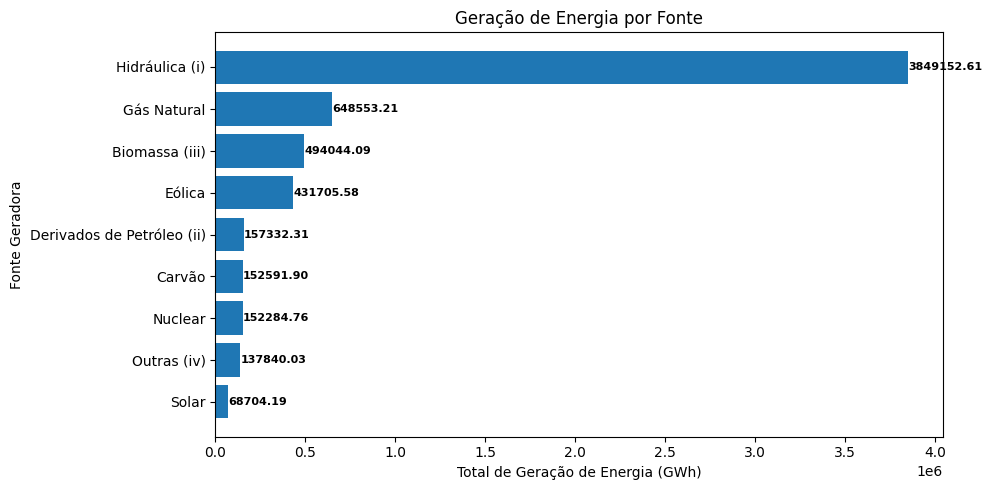

In [ ]:
# Vamos transformar a coluna 'Ano' para o formato de data
df_tratado['Ano'] = pd.to_datetime(df_tratado['Ano'])

# Separar o DataFrame excluindo a linha 'Total'
df_grupos = df_tratado[df_tratado['Grupo'] != 'Total']

# Gráfico de barra horizontal para Agrupamento por Grupo
plt.figure(figsize=(10, 5))
grupo_grupo = df_grupos.groupby('Grupo')['Total'].sum()
grupo_grupo = grupo_grupo.sort_values()

# Plotar o gráfico
bars = plt.barh(grupo_grupo.index, grupo_grupo.values)
plt.title('Geração de Energia por Fonte')
plt.xlabel('Total de Geração de Energia (GWh)')
plt.ylabel('Fonte Geradora')

# Adicionar valores no final das barras em negrito
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center', ha='left', fontsize=8, weight='bold')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

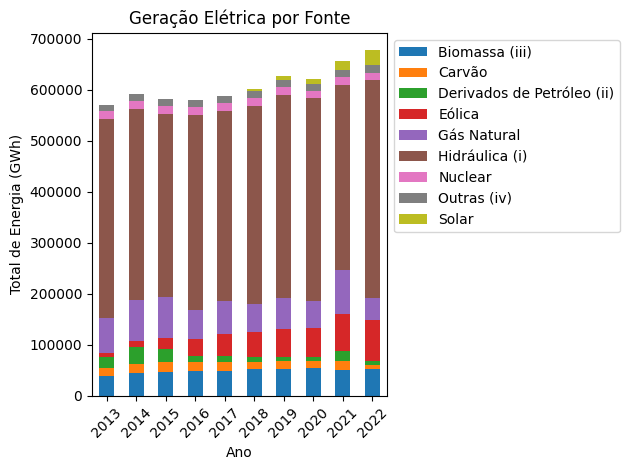

In [ ]:
# Vamos transformar a coluna 'Ano' para o formato de data
df_tratado['Ano'] = pd.to_datetime(df_tratado['Ano'])

# Separar o DataFrame excluindo a linha 'Total'
df_grupos = df_tratado[df_tratado['Grupo'] != 'Total']

# Pivotar os dados para ter os grupos como colunas
df_pivot = df_grupos.pivot(index='Ano', columns='Grupo', values='Total')

# Criar um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
ax = df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Ano')
plt.ylabel('Total de Energia (GWh)')
plt.title('Geração Elétrica por Fonte')

# Posicionar a legenda fora do gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Formatar o eixo x para mostrar apenas o ano
years = df_pivot.index.year
ax.set_xticklabels(years)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()